# The dataset object

The dataset object reads standard csv files, checks the frequency, and creates the cross validation indicies for training.  It is an interface between the data in csv format and then transform function that converts the dataset into an input appropriate for a particular algorithm.

In [1]:
import os
import pandas as pd

import athena

There are several inputs:
- The filename of the data to read.  This can be an absolute or relative path, or it may be the name of the file in the environment variable ATHENA_DATA_PATH.
- `index`: The column in the csv that contains the timestamp information that will serve as an index.
- `freq`: The sample rate of the data.
- `max_days`: Optional.  Maximum number of days to use.
- `max_training_days`: Optional.  The max number of training days to include with each cross validation set.
- `prediction_length`: How many future observations are we forecasting?
- `test_start_values`: List of datetime values where cross validation starts.
- `test_sequence_length`: The number of steps forward from each `test_start_values` to include in the cross validation. 

Here are a few examples.

        max_training_days=10
        predition_length=48    #an entire day
        test_sequence_length=1

<AxesSubplot:>

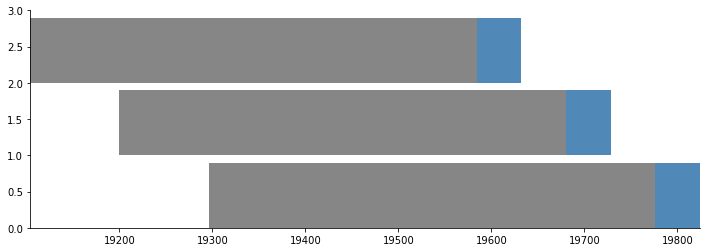

In [2]:
ds = athena.Dataset("../test/data/dfw_demand.csv.gz",                
                    index="timestamp", 
                    freq="30min",
                    max_days=500,
                    max_training_days=10,
                    predition_length=48,
                    test_start_values=['2019-07-01 00:00:00', '2019-07-03 00:00:00', '2019-07-05 00:00:00'],
                    test_sequence_length=1
                    )

ds.plot_cv()

Because the `test_sequence_length` is one, there are only three cross validation tests.  The test sets (blue) are 48 observations long.  The training sets are 48*10 (`max_training_days=10`) observations long.

<AxesSubplot:>

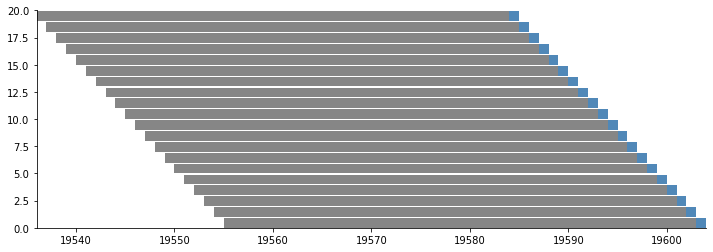

In [3]:
ds = athena.Dataset("../test/data/dfw_demand.csv.gz",                
                    index="timestamp", 
                    freq="30min",
                    max_days=500,
                    max_training_days=1,
                    predition_length=1,
                    test_start_values=['2019-07-01 00:00:00'],
                    test_sequence_length=20
                    )

ds.plot_cv()

Here, the `test_sequence_length=20` determines the number of CV sets.  The predition length is 1, so only a single observation is included.  The `max_training_days=1` is set to a small value so that we can still observe the prediction_length.

This creates 20 sequential tests that forecast a single step foreward for the day defined by `test_start_values[0]`.